In [5]:
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
def plot_data(input_data_path, input_query_path, output_file_path):
    plt.figure(dpi=100) 

    # plt.rcParams["figure.figsize"] = (3,6)
    
    data = pd.read_csv(input_data_path, header=None)  
    plt.scatter(data[1], data[0], s=1) 

    if input_query_path:
        queries = pd.read_csv(input_query_path, header=None) 
        queries = queries.sample(n=400, replace=True) 
        
        for index, row in queries.iterrows():
            x1, y1, x2, y2 = row[0], row[1], row[2], row[3]
            lower_left_x = min(x1, x2)
            lower_left_y = min(y1, y2)
            width = abs(x2 - x1)
            height = abs(y2 - y1)
            
            rect = plt.Rectangle((lower_left_x, lower_left_y), width, height, linewidth=1, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)

    # plt.title('Spatial Dataset Plot')
    # plt.xlabel('X coordinate')
    # plt.ylabel('Y coordinate')
    

    plt.axis('equal')

    plt.gca().set_xticks([]) 
    plt.gca().set_yticks([]) 

    plt.savefig(output_file_path, format='pdf', bbox_inches='tight') 
    plt.show() 
    plt.close() 

In [ ]:
files = [
    # {'data':'../data/real/dataset/OSM_10000.csv', 'query':'../data/real/query/OSM_10000_range_1000_2_uniform_1_0.01x0.01.csv',
    # 'output':'../figs/data/OSM_10000.pdf'},
    # {'data':'../data/real/dataset/OSM_10000.csv', 'query':'',
    # 'output':'../figs/data/OSM_10000_with_query.pdf'},
    # {'data':'../data/synthetic/dataset/data_10000_2_uniform_1.csv', 'query':'../data/synthetic/query/range_1000_2_normal_1_0.01x0.01.csv',
    # 'output':'../figs/data/data_10000_2_uniform_1.pdf'},
    # {'data':'../data/synthetic/dataset/data_10000_2_uniform_1.csv', 'query':'',
    # 'output':'../figs/data/data_10000_2_uniform_1_with_query.pdf'},
    # {'data':'../data/real/dataset/australia_10000.csv', 'query':'',
    # 'output':'../figs/data/australia_10000.pdf'},   
    {'data':'../data/real/dataset/india_10000.csv', 'query':'',
    'output':'../figs/data/india_10000.pdf'},    
    {'data':'../data/real/dataset/australia_10000.csv', 'query':'',
    'output':'../figs/data/us_10000.pdf'},   
    {'data':'../data/real/dataset/us_10000.csv', 'query':'',
    'output':'../figs/data/us_10000.pdf'},   
]

for filemap in files:
    plot_data(filemap['data'], filemap['query'], filemap['output'])

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
def plot_data(input_data_paths, input_query_paths, input_insertion_paths, output_file_path):
    assert len(input_data_paths) == len(input_query_paths) == 3, "There must be exactly three data and query paths."
    
    fig = plt.figure(figsize=(18, 6), dpi=100) 
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1.2, 1]) 

    for i in range(3):
        gs = gridspec.GridSpec(2, 2, width_ratios=[5, 1], height_ratios=[1, 4],
                               left=0.1 + i * 0.3, right=0.4 + i * 0.3, wspace=0.02, hspace=0.02)
        main_ax = fig.add_subplot(gs[1, 0])  
        histx_ax = fig.add_subplot(gs[0, 0], sharex=main_ax) 
        histy_ax = fig.add_subplot(gs[1, 1], sharey=main_ax)  
        
        data = pd.read_csv(input_data_paths[i], header=None)
        scatter = main_ax.scatter(data[1], data[0], s=10, alpha=0.6,edgecolor='none') 

        histx_ax.hist(data[1], bins=40, alpha=0.7, color='gray')
        histx_ax.axis('off') 

        histy_ax.hist(data[0], bins=40, orientation='horizontal', alpha=0.7, color='gray')
        histy_ax.axis('off') 

        if input_query_paths[i]:
            queries = pd.read_csv(input_query_paths[i], header=None)
            queries = queries.sample(n=400, replace=True)
            for index, row in queries.iterrows():
                x1, y1, x2, y2 = row[1], row[0], row[3], row[2]
                rect = plt.Rectangle((min(x1, x2), min(y1, y2)), abs(x2 - x1), abs(y2 - y1),
                                     linewidth=1, edgecolor='red', facecolor='none')
                main_ax.add_patch(rect)

        if input_insertion_paths[i]:
            insertions = pd.read_csv(input_insertion_paths[i], header=None)
            main_ax.scatter(insertions[1], insertions[0], c='red', s=10, marker='o')  # Plot insertion points

        main_ax.set_xticks([]) 
        main_ax.set_yticks([]) 

    # plt.tight_layout() 
    plt.savefig(output_file_path, format='pdf', bbox_inches='tight')  # Save the figure to a file
    plt.show()  # Display the figure
    plt.close(fig)  # Close the figure to free up memory

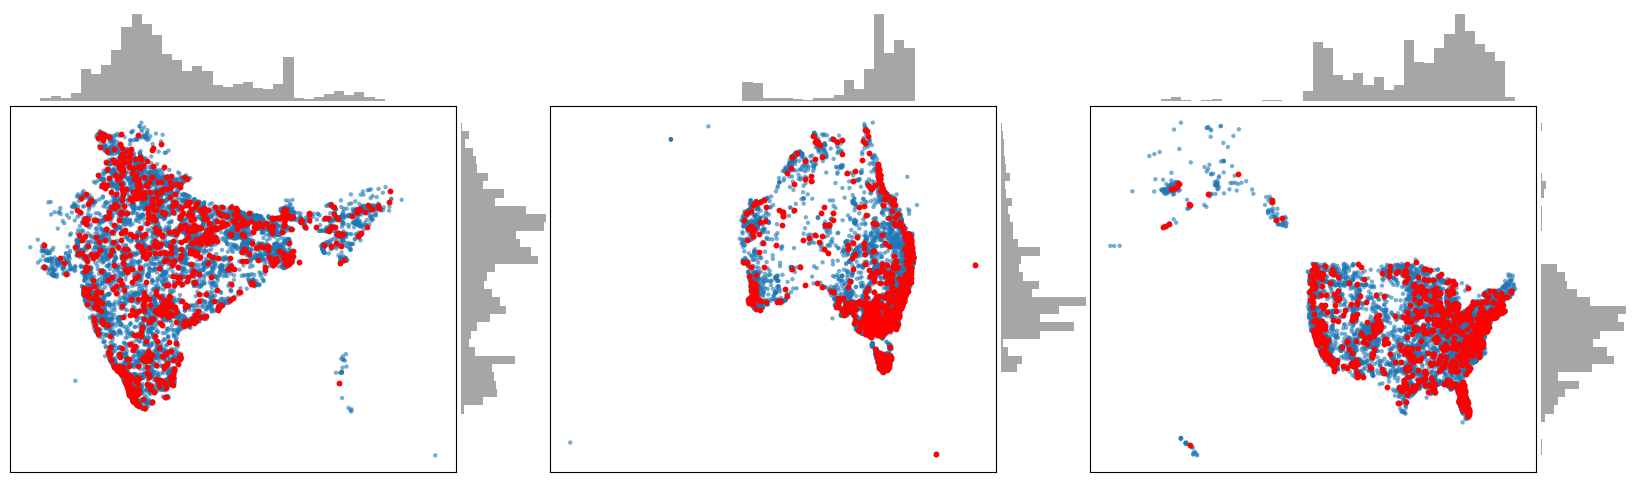

In [9]:
input_data_paths = ['../data/real/dataset/india_10000.csv', '../data/real/dataset/australia_10000.csv', '../data/real/dataset/us_10000.csv']
input_query_paths = ['../data/real/query/india_10000_range_100_2_uniform_1_1.0x1.0.csv', '../data/real/query/australia_10000_range_100_2_uniform_1_1.0x1.0.csv', '../data/real/query/us_10000_range_100_2_uniform_1_1.0x1.0.csv']
input_query_paths = ['','','']
input_insertion_paths = ['../data/real/query/india_10000_insert_1000_2_uniform_1.csv',
                         '../data/real/query/australia_10000_insert_1000_2_uniform_1.csv',
                         '../data/real/query/us_10000_insert_1000_2_uniform_1.csv']
# input_insertion_paths = ['','','']
output_file_path = '../figs/data/real_dataset_10000_hist.pdf' 
plot_data(input_data_paths, input_query_paths, input_insertion_paths, output_file_path)

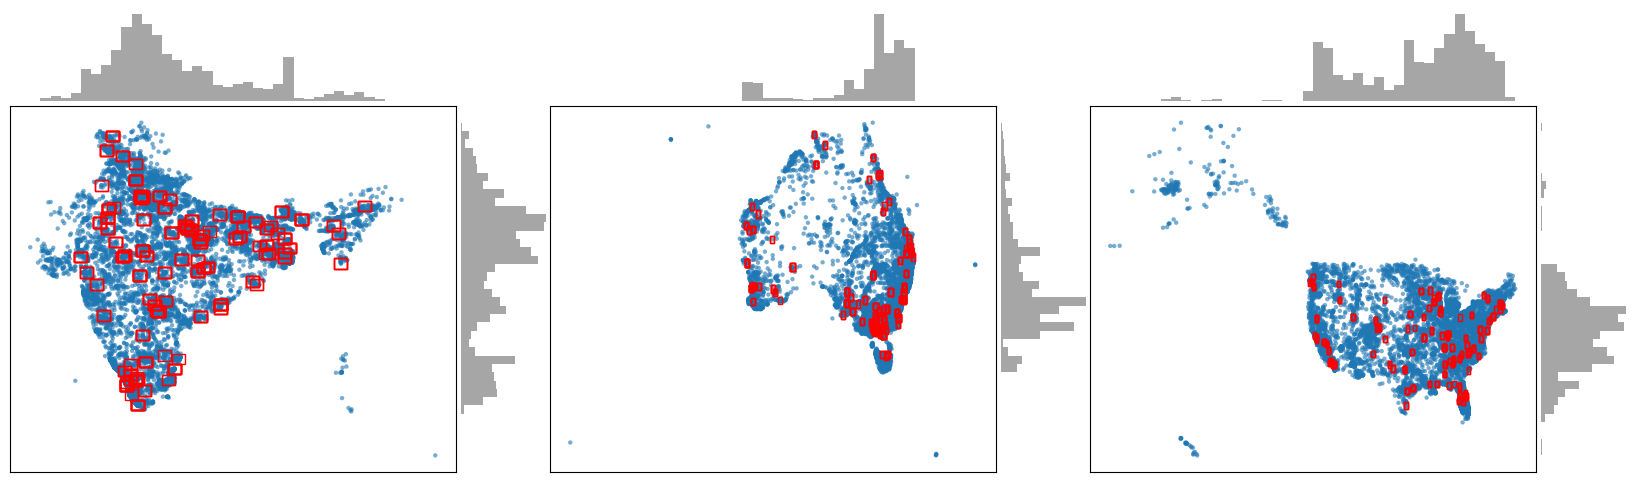

In [10]:
input_data_paths = ['../data/real/dataset/india_10000.csv', '../data/real/dataset/australia_10000.csv', '../data/real/dataset/us_10000.csv']
input_query_paths = ['../data/real/query/india_10000_range_100_2_uniform_1_1.0x1.0.csv', '../data/real/query/australia_10000_range_100_2_uniform_1_1.0x1.0.csv', '../data/real/query/us_10000_range_100_2_uniform_1_1.0x1.0.csv']
# input_query_paths = ['','','']
input_insertion_paths = ['../data/real/query/india_10000_insert_1000_2_uniform_1.csv',
                         '../data/real/query/australia_10000_insert_1000_2_uniform_1.csv',
                         '../data/real/query/us_10000_insert_1000_2_uniform_1.csv']
input_insertion_paths = ['','','']
output_file_path = '../figs/data/real_dataset_10000_hist.pdf' 
plot_data(input_data_paths, input_query_paths, input_insertion_paths, output_file_path)

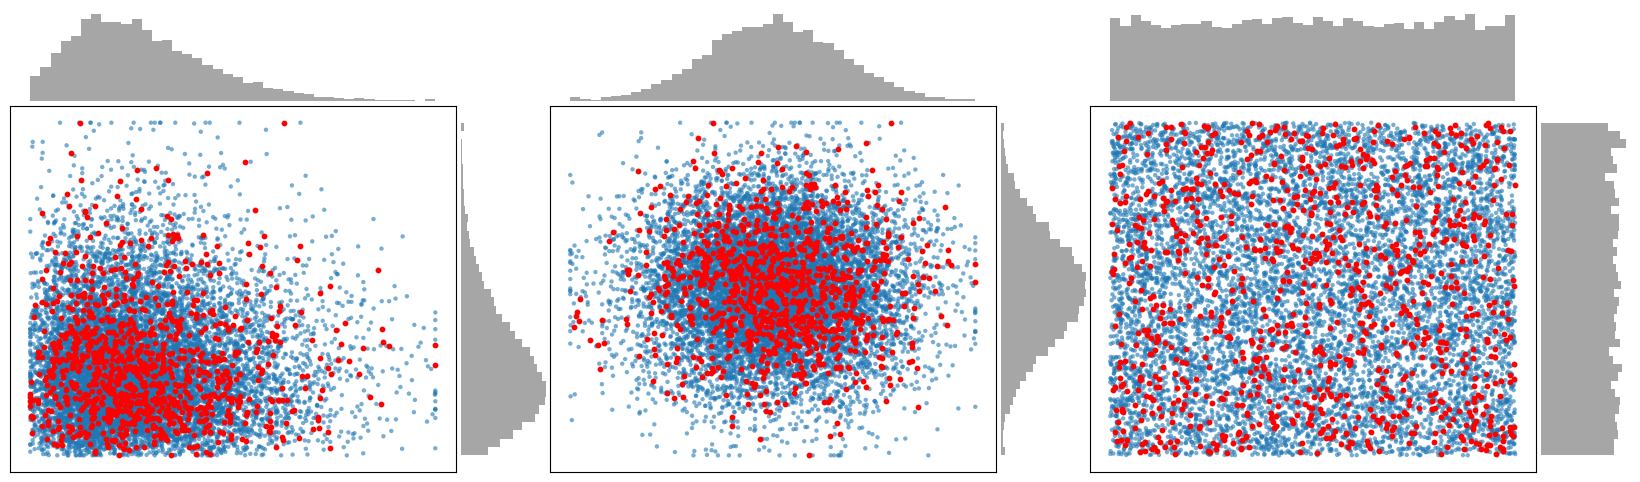

In [11]:
input_data_paths = ['../data/synthetic/dataset/data_10000_2_skewed_2.csv', '../data/synthetic/dataset/data_10000_2_normal_1.csv', '../data/synthetic/dataset/data_10000_2_uniform_1.csv']
input_query_paths = ['../data/synthetic/query/range_100_2_skewed_2_0.1x0.1.csv', '../data/synthetic/query/range_100_2_normal_1_0.1x0.1.csv', '../data/synthetic/query/range_100_2_uniform_1_0.1x0.1.csv']
input_query_paths = ['','','']
input_insertion_paths = ['../data/synthetic/query/insert_1000_2_skewed_2.csv',
                         '../data/synthetic/query/insert_1000_2_normal_1.csv',
                        '../data/synthetic/query/insert_1000_2_uniform_1.csv']
# input_insertion_paths = ['','','']
output_file_path = '../figs/data/synthetic_dataset_10000_hist.pdf' 
plot_data(input_data_paths, input_query_paths, input_insertion_paths, output_file_path)

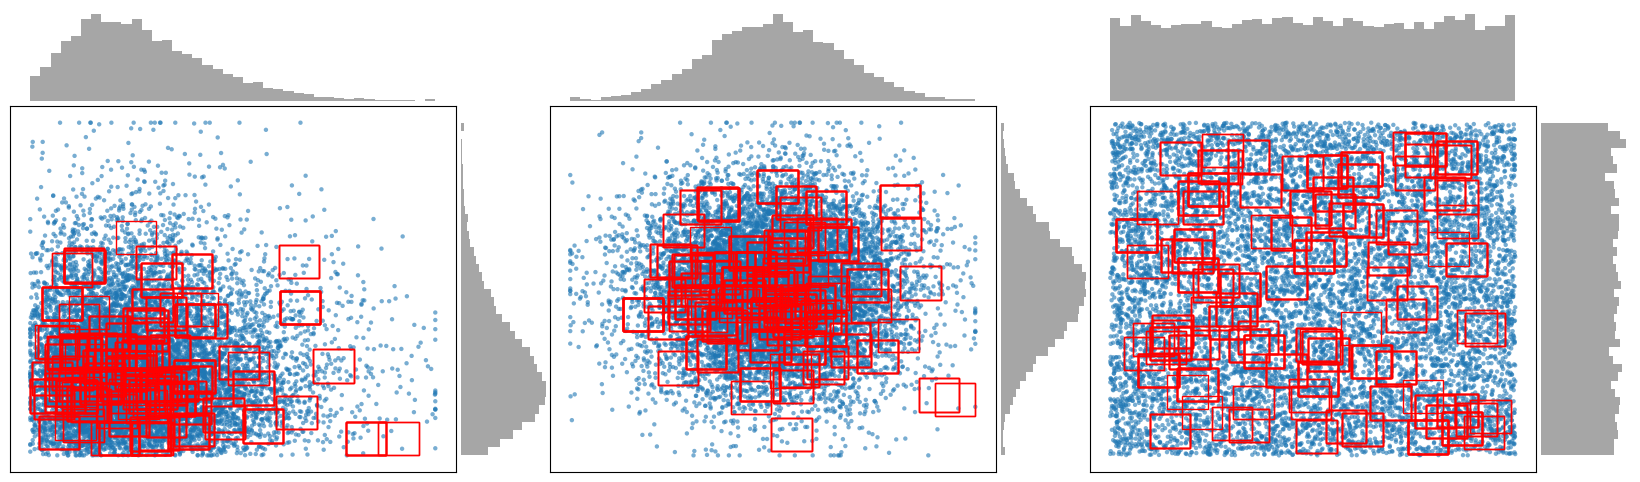

In [14]:
input_data_paths = ['../data/synthetic/dataset/data_10000_2_skewed_2.csv', '../data/synthetic/dataset/data_10000_2_normal_1.csv', '../data/synthetic/dataset/data_10000_2_uniform_1.csv']
input_query_paths = ['../data/synthetic/query/range_100_2_skewed_2_0.1x0.1.csv', '../data/synthetic/query/range_100_2_normal_1_0.1x0.1.csv', '../data/synthetic/query/range_100_2_uniform_1_0.1x0.1.csv']
# input_query_paths = ['','','']
input_insertion_paths = ['../data/synthetic/query/insert_1000_2_skewed_2.csv',
                         '../data/synthetic/query/insert_1000_2_normal_1.csv',
                        '../data/synthetic/query/insert_1000_2_uniform_1.csv']
input_insertion_paths = ['','','']
output_file_path = '../figs/data/synthetic_dataset_10000_hist.pdf' 
plot_data(input_data_paths, input_query_paths, input_insertion_paths, output_file_path)

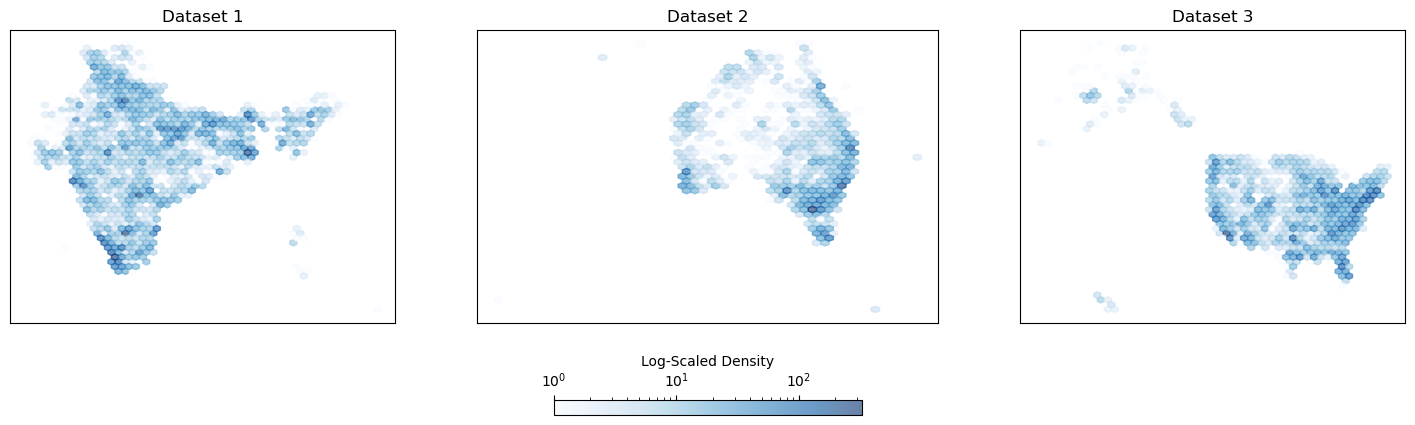

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


def plot_data_dens(input_data_paths, output_file_path):
    assert len(input_data_paths) == 3, "There must be exactly three data paths."
    
    fig = plt.figure(figsize=(18, 5), dpi=100) 
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1.2, 1]) 

    for i, data_path in enumerate(input_data_paths):
        ax = fig.add_subplot(gs[i])  
        data = pd.read_csv(data_path, header=None)
        
        hb = ax.hexbin(data[1], data[0], gridsize=50, cmap='Blues', norm=LogNorm(), alpha=0.6)
        
        ax.set_title(f"Dataset {i+1}")  
        ax.set_xticks([]) 
        ax.set_yticks([]) 

    cbar = fig.colorbar(hb, ax=fig.axes, orientation='horizontal', pad=0.2, fraction=0.04)
    cbar.set_label('Log-Scaled Density')
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')

    # plt.tight_layout() 
    plt.savefig(output_file_path, format='pdf', bbox_inches='tight') 
    plt.show()  
    plt.close(fig)  


input_data_paths = ['../data/real/dataset/india_10000.csv', '../data/real/dataset/australia_10000.csv', '../data/real/dataset/us_10000.csv']
output_file_path = '../figs/data/real_dataset_10000_density.pdf' 
plot_data_dens(input_data_paths, output_file_path)

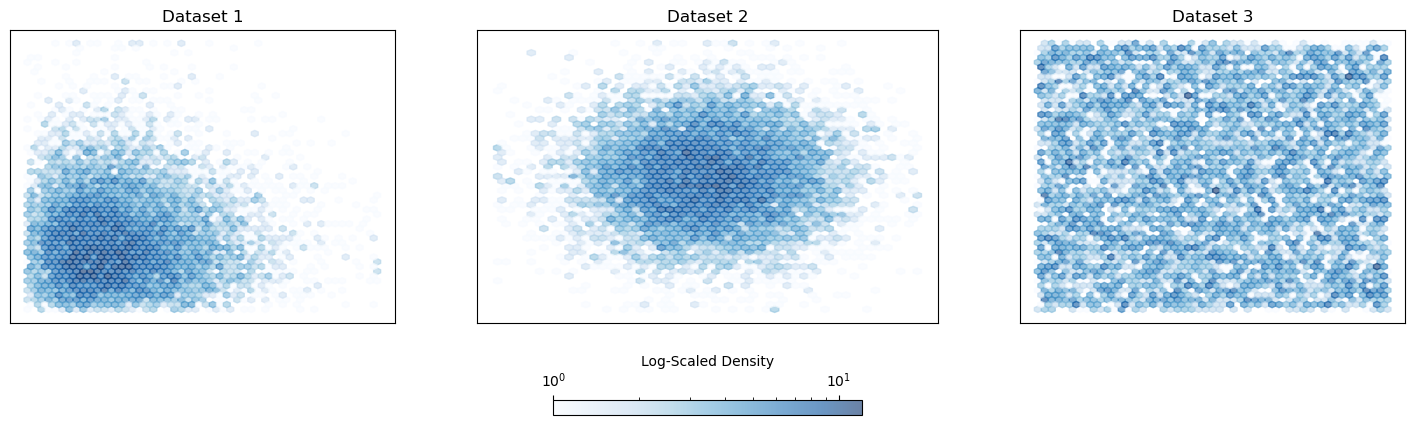

In [16]:
input_data_paths = ['../data/synthetic/dataset/data_10000_2_skewed_2.csv', '../data/synthetic/dataset/data_10000_2_normal_1.csv', '../data/synthetic/dataset/data_10000_2_uniform_1.csv']
output_file_path = '../figs/data/synthetic_dataset_10000_density.pdf' 
plot_data_dens(input_data_paths, output_file_path)
